## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

mkdir: cannot create directory ‘/data’: File exists
--2020-05-18 02:01:10--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.102.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.102.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  76.9MB/s    in 4.2s    

2020-05-18 02:01:14 (76.2 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Ha

  inflating: /data/test/Andy_Rooney_20.jpg  
  inflating: /data/test/Andy_Rooney_21.jpg  
  inflating: /data/test/Andy_Rooney_50.jpg  
  inflating: /data/test/Andy_Rooney_51.jpg  
  inflating: /data/test/Angel_Lockward_30.jpg  
  inflating: /data/test/Angel_Lockward_31.jpg  
  inflating: /data/test/Angel_Lockward_40.jpg  
  inflating: /data/test/Angel_Lockward_41.jpg  
  inflating: /data/test/Angel_Lockward_50.jpg  
  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/test/Angela_Bassett_21.jpg  
  inflating: /data/test/Angela_Bassett_30.jpg  
  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data/test/Angela_Bassett_41.jpg  
  inflating: /data/test/Angelo_Reyes_20.jpg  
  inflating: /data/test/Angelo_Reyes_21.jpg  
  inflating: /data/test/Angelo_Reyes_30.jpg  
  inflating: /data/test/Angelo_Reyes_31.jpg  
  inflating: /data/test/Angelo_Reyes_50.jpg  
  inflating: /

  inflating: /data/test/Celso_Amorim_41.jpg  
  inflating: /data/test/Celso_Amorim_50.jpg  
  inflating: /data/test/Celso_Amorim_51.jpg  
  inflating: /data/test/Celso_Lafer_00.jpg  
  inflating: /data/test/Celso_Lafer_01.jpg  
  inflating: /data/test/Celso_Lafer_10.jpg  
  inflating: /data/test/Celso_Lafer_11.jpg  
  inflating: /data/test/Celso_Lafer_20.jpg  
  inflating: /data/test/Celso_Lafer_21.jpg  
  inflating: /data/test/Chadha_Gurinder_10.jpg  
  inflating: /data/test/Chadha_Gurinder_11.jpg  
  inflating: /data/test/Chadha_Gurinder_20.jpg  
  inflating: /data/test/Chadha_Gurinder_21.jpg  
  inflating: /data/test/Chadha_Gurinder_50.jpg  
  inflating: /data/test/Chadha_Gurinder_51.jpg  
  inflating: /data/test/Charles_Bronson_00.jpg  
  inflating: /data/test/Charles_Bronson_01.jpg  
  inflating: /data/test/Charles_Bronson_10.jpg  
  inflating: /data/test/Charles_Bronson_11.jpg  
  inflating: /data/test/Charles_Bronson_50.jpg  
  inflating: /data/test/Charles_Bronson_51.jpg  
  in

  inflating: /data/test/Condoleezza_Rice_41.jpg  
  inflating: /data/test/Connie_Chung_20.jpg  
  inflating: /data/test/Connie_Chung_21.jpg  
  inflating: /data/test/Connie_Chung_30.jpg  
  inflating: /data/test/Connie_Chung_31.jpg  
  inflating: /data/test/Connie_Chung_40.jpg  
  inflating: /data/test/Connie_Chung_41.jpg  
  inflating: /data/test/Connie_Chung_50.jpg  
  inflating: /data/test/Connie_Chung_51.jpg  
  inflating: /data/test/Craig_David_10.jpg  
  inflating: /data/test/Craig_David_11.jpg  
  inflating: /data/test/Craig_David_20.jpg  
  inflating: /data/test/Craig_David_21.jpg  
  inflating: /data/test/Craig_David_30.jpg  
  inflating: /data/test/Craig_David_31.jpg  
  inflating: /data/test/Craig_David_50.jpg  
  inflating: /data/test/Craig_David_51.jpg  
  inflating: /data/test/Cristina_Fernandez_30.jpg  
  inflating: /data/test/Cristina_Fernandez_31.jpg  
  inflating: /data/test/Cristina_Fernandez_40.jpg  
  inflating: /data/test/Cristina_Fernandez_41.jpg  
  inflating: /

  inflating: /data/test/Elmar_Brok_31.jpg  
  inflating: /data/test/Elsa_Zylberstein_00.jpg  
  inflating: /data/test/Elsa_Zylberstein_01.jpg  
  inflating: /data/test/Elsa_Zylberstein_10.jpg  
  inflating: /data/test/Elsa_Zylberstein_11.jpg  
  inflating: /data/test/Elsa_Zylberstein_40.jpg  
  inflating: /data/test/Elsa_Zylberstein_41.jpg  
  inflating: /data/test/Elton_John_10.jpg  
  inflating: /data/test/Elton_John_11.jpg  
  inflating: /data/test/Elton_John_20.jpg  
  inflating: /data/test/Elton_John_21.jpg  
  inflating: /data/test/Elton_John_30.jpg  
  inflating: /data/test/Elton_John_31.jpg  
  inflating: /data/test/Elton_John_40.jpg  
  inflating: /data/test/Elton_John_41.jpg  
  inflating: /data/test/Emile_Lahoud_00.jpg  
  inflating: /data/test/Emile_Lahoud_01.jpg  
  inflating: /data/test/Emile_Lahoud_30.jpg  
  inflating: /data/test/Emile_Lahoud_31.jpg  
  inflating: /data/test/Emile_Lahoud_40.jpg  
  inflating: /data/test/Emile_Lahoud_41.jpg  
  inflating: /data/test/Emil

  inflating: /data/test/Gary_Condit_30.jpg  
  inflating: /data/test/Gary_Condit_31.jpg  
  inflating: /data/test/Gene_Hackman_20.jpg  
  inflating: /data/test/Gene_Hackman_21.jpg  
  inflating: /data/test/Gene_Hackman_30.jpg  
  inflating: /data/test/Gene_Hackman_31.jpg  
  inflating: /data/test/Gene_Hackman_40.jpg  
  inflating: /data/test/Gene_Hackman_41.jpg  
  inflating: /data/test/Geoffrey_Rush_00.jpg  
  inflating: /data/test/Geoffrey_Rush_01.jpg  
  inflating: /data/test/Geoffrey_Rush_10.jpg  
  inflating: /data/test/Geoffrey_Rush_11.jpg  
  inflating: /data/test/Geoffrey_Rush_20.jpg  
  inflating: /data/test/Geoffrey_Rush_21.jpg  
  inflating: /data/test/George_Galloway_00.jpg  
  inflating: /data/test/George_Galloway_01.jpg  
  inflating: /data/test/George_Galloway_20.jpg  
  inflating: /data/test/George_Galloway_21.jpg  
  inflating: /data/test/George_Galloway_40.jpg  
  inflating: /data/test/George_Galloway_41.jpg  
  inflating: /data/test/George_Galloway_50.jpg  
  inflati

  inflating: /data/test/Kate_Capshaw_21.jpg  
  inflating: /data/test/Kate_Capshaw_40.jpg  
  inflating: /data/test/Kate_Capshaw_41.jpg  
  inflating: /data/test/Kate_Winslet_00.jpg  
  inflating: /data/test/Kate_Winslet_01.jpg  
  inflating: /data/test/Kate_Winslet_10.jpg  
  inflating: /data/test/Kate_Winslet_11.jpg  
  inflating: /data/test/Kate_Winslet_50.jpg  
  inflating: /data/test/Kate_Winslet_51.jpg  
  inflating: /data/test/Katharine_Hepburn_10.jpg  
  inflating: /data/test/Katharine_Hepburn_11.jpg  
  inflating: /data/test/Katharine_Hepburn_30.jpg  
  inflating: /data/test/Katharine_Hepburn_31.jpg  
  inflating: /data/test/Katharine_Hepburn_40.jpg  
  inflating: /data/test/Katharine_Hepburn_41.jpg  
  inflating: /data/test/Kathryn_Morris_10.jpg  
  inflating: /data/test/Kathryn_Morris_11.jpg  
  inflating: /data/test/Kathryn_Morris_20.jpg  
  inflating: /data/test/Kathryn_Morris_21.jpg  
  inflating: /data/test/Kathryn_Morris_40.jpg  
  inflating: /data/test/Kathryn_Morris_4

  inflating: /data/test/Leticia_Van_de_Putte_01.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_10.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_11.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_40.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_41.jpg  
  inflating: /data/test/Leuris_Pupo_00.jpg  
  inflating: /data/test/Leuris_Pupo_01.jpg  
  inflating: /data/test/Leuris_Pupo_20.jpg  
  inflating: /data/test/Leuris_Pupo_21.jpg  
  inflating: /data/test/Leuris_Pupo_30.jpg  
  inflating: /data/test/Leuris_Pupo_31.jpg  
  inflating: /data/test/Leuris_Pupo_40.jpg  
  inflating: /data/test/Leuris_Pupo_41.jpg  
  inflating: /data/test/Li_Zhaoxing_00.jpg  
  inflating: /data/test/Li_Zhaoxing_01.jpg  
  inflating: /data/test/Li_Zhaoxing_30.jpg  
  inflating: /data/test/Li_Zhaoxing_31.jpg  
  inflating: /data/test/Li_Zhaoxing_40.jpg  
  inflating: /data/test/Li_Zhaoxing_41.jpg  
  inflating: /data/test/Lincoln_Chafee_20.jpg  
  inflating: /data/test/Lincoln_Chafee_21.jpg  
  in

  inflating: /data/test/Marc_Racicot_51.jpg  
  inflating: /data/test/Marc_Shaiman_10.jpg  
  inflating: /data/test/Marc_Shaiman_11.jpg  
  inflating: /data/test/Marc_Shaiman_20.jpg  
  inflating: /data/test/Marc_Shaiman_21.jpg  
  inflating: /data/test/Marc_Shaiman_30.jpg  
  inflating: /data/test/Marc_Shaiman_31.jpg  
  inflating: /data/test/Margaret_Thatcher_10.jpg  
  inflating: /data/test/Margaret_Thatcher_11.jpg  
  inflating: /data/test/Margaret_Thatcher_30.jpg  
  inflating: /data/test/Margaret_Thatcher_31.jpg  
  inflating: /data/test/Margaret_Thatcher_40.jpg  
  inflating: /data/test/Margaret_Thatcher_41.jpg  
  inflating: /data/test/Margaret_Thatcher_50.jpg  
  inflating: /data/test/Margaret_Thatcher_51.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_10.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_11.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_30.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_31.jpg  
  inflatin

  inflating: /data/test/Olene_Walker_01.jpg  
  inflating: /data/test/Olene_Walker_10.jpg  
  inflating: /data/test/Olene_Walker_11.jpg  
  inflating: /data/test/Olene_Walker_30.jpg  
  inflating: /data/test/Olene_Walker_31.jpg  
  inflating: /data/test/Olene_Walker_40.jpg  
  inflating: /data/test/Olene_Walker_41.jpg  
  inflating: /data/test/Olivia_Newton-John_00.jpg  
  inflating: /data/test/Olivia_Newton-John_01.jpg  
  inflating: /data/test/Olivia_Newton-John_10.jpg  
  inflating: /data/test/Olivia_Newton-John_11.jpg  
  inflating: /data/test/Olivia_Newton-John_40.jpg  
  inflating: /data/test/Olivia_Newton-John_41.jpg  
  inflating: /data/test/Orlando_Bloom_00.jpg  
  inflating: /data/test/Orlando_Bloom_01.jpg  
  inflating: /data/test/Orlando_Bloom_30.jpg  
  inflating: /data/test/Orlando_Bloom_31.jpg  
  inflating: /data/test/Orlando_Bloom_40.jpg  
  inflating: /data/test/Orlando_Bloom_41.jpg  
  inflating: /data/test/Orlando_Bloom_50.jpg  
  inflating: /data/test/Orlando_Bloom

  inflating: /data/test/Richard_Branson_50.jpg  
  inflating: /data/test/Richard_Branson_51.jpg  
  inflating: /data/test/Richard_Lennon_00.jpg  
  inflating: /data/test/Richard_Lennon_01.jpg  
  inflating: /data/test/Richard_Lennon_30.jpg  
  inflating: /data/test/Richard_Lennon_31.jpg  
  inflating: /data/test/Richard_Lennon_40.jpg  
  inflating: /data/test/Richard_Lennon_41.jpg  
  inflating: /data/test/Richard_Lugar_00.jpg  
  inflating: /data/test/Richard_Lugar_01.jpg  
  inflating: /data/test/Richard_Lugar_10.jpg  
  inflating: /data/test/Richard_Lugar_11.jpg  
  inflating: /data/test/Richard_Lugar_20.jpg  
  inflating: /data/test/Richard_Lugar_21.jpg  
  inflating: /data/test/Richard_Lugar_50.jpg  
  inflating: /data/test/Richard_Lugar_51.jpg  
  inflating: /data/test/Richard_Paul_Evans_00.jpg  
  inflating: /data/test/Richard_Paul_Evans_01.jpg  
  inflating: /data/test/Richard_Paul_Evans_20.jpg  
  inflating: /data/test/Richard_Paul_Evans_21.jpg  
  inflating: /data/test/Richar

  inflating: /data/test/Tom_Hanks_30.jpg  
  inflating: /data/test/Tom_Hanks_31.jpg  
  inflating: /data/test/Tom_Hanks_40.jpg  
  inflating: /data/test/Tom_Hanks_41.jpg  
  inflating: /data/test/Tom_Hanks_50.jpg  
  inflating: /data/test/Tom_Hanks_51.jpg  
  inflating: /data/test/Tom_Harkin_00.jpg  
  inflating: /data/test/Tom_Harkin_01.jpg  
  inflating: /data/test/Tom_Harkin_30.jpg  
  inflating: /data/test/Tom_Harkin_31.jpg  
  inflating: /data/test/Tom_Harkin_40.jpg  
  inflating: /data/test/Tom_Harkin_41.jpg  
  inflating: /data/test/Tom_Osborne_20.jpg  
  inflating: /data/test/Tom_Osborne_21.jpg  
  inflating: /data/test/Tom_Osborne_30.jpg  
  inflating: /data/test/Tom_Osborne_31.jpg  
  inflating: /data/test/Tom_Osborne_50.jpg  
  inflating: /data/test/Tom_Osborne_51.jpg  
  inflating: /data/test/Tom_Ridge_20.jpg  
  inflating: /data/test/Tom_Ridge_21.jpg  
  inflating: /data/test/Tom_Ridge_30.jpg  
  inflating: /data/test/Tom_Ridge_31.jpg  
  inflating: /data/test/Tom_Ridge_50

  inflating: /data/training/Agbani_Darego_41.jpg  
  inflating: /data/training/Agbani_Darego_42.jpg  
  inflating: /data/training/Agbani_Darego_50.jpg  
  inflating: /data/training/Agbani_Darego_51.jpg  
  inflating: /data/training/Agbani_Darego_52.jpg  
  inflating: /data/training/Agnes_Bruckner_00.jpg  
  inflating: /data/training/Agnes_Bruckner_01.jpg  
  inflating: /data/training/Agnes_Bruckner_02.jpg  
  inflating: /data/training/Agnes_Bruckner_10.jpg  
  inflating: /data/training/Agnes_Bruckner_11.jpg  
  inflating: /data/training/Agnes_Bruckner_12.jpg  
  inflating: /data/training/Agnes_Bruckner_20.jpg  
  inflating: /data/training/Agnes_Bruckner_21.jpg  
  inflating: /data/training/Agnes_Bruckner_22.jpg  
  inflating: /data/training/Agnes_Bruckner_40.jpg  
  inflating: /data/training/Agnes_Bruckner_41.jpg  
  inflating: /data/training/Agnes_Bruckner_42.jpg  
  inflating: /data/training/Ahmad_Masood_00.jpg  
  inflating: /data/training/Ahmad_Masood_01.jpg  
  inflating: /data/tr

  inflating: /data/training/Amy_Brenneman_50.jpg  
  inflating: /data/training/Amy_Brenneman_51.jpg  
  inflating: /data/training/Amy_Brenneman_52.jpg  
  inflating: /data/training/Andrea_Bocelli_10.jpg  
  inflating: /data/training/Andrea_Bocelli_11.jpg  
  inflating: /data/training/Andrea_Bocelli_12.jpg  
  inflating: /data/training/Andrea_Bocelli_20.jpg  
  inflating: /data/training/Andrea_Bocelli_21.jpg  
  inflating: /data/training/Andrea_Bocelli_22.jpg  
  inflating: /data/training/Andrea_Bocelli_30.jpg  
  inflating: /data/training/Andrea_Bocelli_31.jpg  
  inflating: /data/training/Andrea_Bocelli_32.jpg  
  inflating: /data/training/Andy_Roddick_20.jpg  
  inflating: /data/training/Andy_Roddick_21.jpg  
  inflating: /data/training/Andy_Roddick_22.jpg  
  inflating: /data/training/Andy_Roddick_40.jpg  
  inflating: /data/training/Andy_Roddick_41.jpg  
  inflating: /data/training/Andy_Roddick_42.jpg  
  inflating: /data/training/Andy_Roddick_50.jpg  
  inflating: /data/training/A

  inflating: /data/training/Bill_Bradley_50.jpg  
  inflating: /data/training/Bill_Bradley_51.jpg  
  inflating: /data/training/Bill_Bradley_52.jpg  
  inflating: /data/training/Bill_Clinton_00.jpg  
  inflating: /data/training/Bill_Clinton_01.jpg  
  inflating: /data/training/Bill_Clinton_02.jpg  
  inflating: /data/training/Bill_Clinton_10.jpg  
  inflating: /data/training/Bill_Clinton_11.jpg  
  inflating: /data/training/Bill_Clinton_12.jpg  
  inflating: /data/training/Bill_Clinton_50.jpg  
  inflating: /data/training/Bill_Clinton_51.jpg  
  inflating: /data/training/Bill_Clinton_52.jpg  
  inflating: /data/training/Bill_Frist_00.jpg  
  inflating: /data/training/Bill_Frist_01.jpg  
  inflating: /data/training/Bill_Frist_02.jpg  
  inflating: /data/training/Bill_Frist_10.jpg  
  inflating: /data/training/Bill_Frist_11.jpg  
  inflating: /data/training/Bill_Frist_12.jpg  
  inflating: /data/training/Bill_Frist_20.jpg  
  inflating: /data/training/Bill_Frist_21.jpg  
  inflating: /da

  inflating: /data/training/Chita_Rivera_02.jpg  
  inflating: /data/training/Chita_Rivera_10.jpg  
  inflating: /data/training/Chita_Rivera_11.jpg  
  inflating: /data/training/Chita_Rivera_12.jpg  
  inflating: /data/training/Chita_Rivera_30.jpg  
  inflating: /data/training/Chita_Rivera_31.jpg  
  inflating: /data/training/Chita_Rivera_32.jpg  
  inflating: /data/training/Chris_Cirino_20.jpg  
  inflating: /data/training/Chris_Cirino_21.jpg  
  inflating: /data/training/Chris_Cirino_22.jpg  
  inflating: /data/training/Chris_Cirino_30.jpg  
  inflating: /data/training/Chris_Cirino_31.jpg  
  inflating: /data/training/Chris_Cirino_32.jpg  
  inflating: /data/training/Chris_Cirino_50.jpg  
  inflating: /data/training/Chris_Cirino_51.jpg  
  inflating: /data/training/Chris_Cirino_52.jpg  
  inflating: /data/training/Chris_Cooper_00.jpg  
  inflating: /data/training/Chris_Cooper_01.jpg  
  inflating: /data/training/Chris_Cooper_02.jpg  
  inflating: /data/training/Chris_Cooper_30.jpg  


  inflating: /data/training/Colin_Powell_52.jpg  
  inflating: /data/training/Conan_OBrien_00.jpg  
  inflating: /data/training/Conan_OBrien_01.jpg  
  inflating: /data/training/Conan_OBrien_02.jpg  
  inflating: /data/training/Conan_OBrien_10.jpg  
  inflating: /data/training/Conan_OBrien_11.jpg  
  inflating: /data/training/Conan_OBrien_12.jpg  
  inflating: /data/training/Conan_OBrien_50.jpg  
  inflating: /data/training/Conan_OBrien_51.jpg  
  inflating: /data/training/Conan_OBrien_52.jpg  
  inflating: /data/training/Condoleezza_Rice_10.jpg  
  inflating: /data/training/Condoleezza_Rice_11.jpg  
  inflating: /data/training/Condoleezza_Rice_12.jpg  
  inflating: /data/training/Condoleezza_Rice_20.jpg  
  inflating: /data/training/Condoleezza_Rice_21.jpg  
  inflating: /data/training/Condoleezza_Rice_22.jpg  
  inflating: /data/training/Condoleezza_Rice_30.jpg  
  inflating: /data/training/Condoleezza_Rice_31.jpg  
  inflating: /data/training/Condoleezza_Rice_32.jpg  
  inflating: /

  inflating: /data/training/Edie_Falco_31.jpg  
  inflating: /data/training/Edie_Falco_32.jpg  
  inflating: /data/training/Edie_Falco_40.jpg  
  inflating: /data/training/Edie_Falco_41.jpg  
  inflating: /data/training/Edie_Falco_42.jpg  
  inflating: /data/training/Edie_Falco_50.jpg  
  inflating: /data/training/Edie_Falco_51.jpg  
  inflating: /data/training/Edie_Falco_52.jpg  
  inflating: /data/training/Eduardo_Duhalde_00.jpg  
  inflating: /data/training/Eduardo_Duhalde_01.jpg  
  inflating: /data/training/Eduardo_Duhalde_02.jpg  
  inflating: /data/training/Eduardo_Duhalde_10.jpg  
  inflating: /data/training/Eduardo_Duhalde_11.jpg  
  inflating: /data/training/Eduardo_Duhalde_12.jpg  
  inflating: /data/training/Eduardo_Duhalde_30.jpg  
  inflating: /data/training/Eduardo_Duhalde_31.jpg  
  inflating: /data/training/Eduardo_Duhalde_32.jpg  
  inflating: /data/training/Edward_Burns_10.jpg  
  inflating: /data/training/Edward_Burns_11.jpg  
  inflating: /data/training/Edward_Burn

  inflating: /data/training/Eric_Benet_12.jpg  
  inflating: /data/training/Eric_Benet_30.jpg  
  inflating: /data/training/Eric_Benet_31.jpg  
  inflating: /data/training/Eric_Benet_32.jpg  
  inflating: /data/training/Erin_Hershey_Presley_10.jpg  
  inflating: /data/training/Erin_Hershey_Presley_11.jpg  
  inflating: /data/training/Erin_Hershey_Presley_12.jpg  
  inflating: /data/training/Erin_Hershey_Presley_30.jpg  
  inflating: /data/training/Erin_Hershey_Presley_31.jpg  
  inflating: /data/training/Erin_Hershey_Presley_32.jpg  
  inflating: /data/training/Erin_Hershey_Presley_40.jpg  
  inflating: /data/training/Erin_Hershey_Presley_41.jpg  
  inflating: /data/training/Erin_Hershey_Presley_42.jpg  
  inflating: /data/training/Ernest_Hollings_00.jpg  
  inflating: /data/training/Ernest_Hollings_01.jpg  
  inflating: /data/training/Ernest_Hollings_02.jpg  
  inflating: /data/training/Ernest_Hollings_10.jpg  
  inflating: /data/training/Ernest_Hollings_11.jpg  
  inflating: /data/tr

  inflating: /data/training/Gabi_Zimmer_20.jpg  
  inflating: /data/training/Gabi_Zimmer_21.jpg  
  inflating: /data/training/Gabi_Zimmer_22.jpg  
  inflating: /data/training/Gabi_Zimmer_50.jpg  
  inflating: /data/training/Gabi_Zimmer_51.jpg  
  inflating: /data/training/Gabi_Zimmer_52.jpg  
  inflating: /data/training/Gary_Bettman_10.jpg  
  inflating: /data/training/Gary_Bettman_11.jpg  
  inflating: /data/training/Gary_Bettman_12.jpg  
  inflating: /data/training/Gary_Bettman_30.jpg  
  inflating: /data/training/Gary_Bettman_31.jpg  
  inflating: /data/training/Gary_Bettman_32.jpg  
  inflating: /data/training/Gary_Bettman_40.jpg  
  inflating: /data/training/Gary_Bettman_41.jpg  
  inflating: /data/training/Gary_Bettman_42.jpg  
  inflating: /data/training/Gary_Coleman_30.jpg  
  inflating: /data/training/Gary_Coleman_31.jpg  
  inflating: /data/training/Gary_Coleman_32.jpg  
  inflating: /data/training/Gary_Coleman_40.jpg  
  inflating: /data/training/Gary_Coleman_41.jpg  
  infl

  inflating: /data/training/Jake_Plummer_21.jpg  
  inflating: /data/training/Jake_Plummer_22.jpg  
  inflating: /data/training/Jake_Plummer_40.jpg  
  inflating: /data/training/Jake_Plummer_41.jpg  
  inflating: /data/training/Jake_Plummer_42.jpg  
  inflating: /data/training/Jake_Plummer_50.jpg  
  inflating: /data/training/Jake_Plummer_51.jpg  
  inflating: /data/training/Jake_Plummer_52.jpg  
  inflating: /data/training/James_Carville_00.jpg  
  inflating: /data/training/James_Carville_01.jpg  
  inflating: /data/training/James_Carville_02.jpg  
  inflating: /data/training/James_Carville_10.jpg  
  inflating: /data/training/James_Carville_11.jpg  
  inflating: /data/training/James_Carville_12.jpg  
  inflating: /data/training/James_Carville_30.jpg  
  inflating: /data/training/James_Carville_31.jpg  
  inflating: /data/training/James_Carville_32.jpg  
  inflating: /data/training/James_Carville_50.jpg  
  inflating: /data/training/James_Carville_51.jpg  
  inflating: /data/training/

  inflating: /data/training/Kieran_Culkin_00.jpg  
  inflating: /data/training/Kieran_Culkin_01.jpg  
  inflating: /data/training/Kieran_Culkin_02.jpg  
  inflating: /data/training/Kieran_Culkin_10.jpg  
  inflating: /data/training/Kieran_Culkin_11.jpg  
  inflating: /data/training/Kieran_Culkin_12.jpg  
  inflating: /data/training/Kieran_Culkin_20.jpg  
  inflating: /data/training/Kieran_Culkin_21.jpg  
  inflating: /data/training/Kieran_Culkin_22.jpg  
  inflating: /data/training/Kirk_Ferentz_00.jpg  
  inflating: /data/training/Kirk_Ferentz_01.jpg  
  inflating: /data/training/Kirk_Ferentz_02.jpg  
  inflating: /data/training/Kirk_Ferentz_20.jpg  
  inflating: /data/training/Kirk_Ferentz_21.jpg  
  inflating: /data/training/Kirk_Ferentz_22.jpg  
  inflating: /data/training/Kirk_Ferentz_40.jpg  
  inflating: /data/training/Kirk_Ferentz_41.jpg  
  inflating: /data/training/Kirk_Ferentz_42.jpg  
  inflating: /data/training/Kirk_Ferentz_50.jpg  
  inflating: /data/training/Kirk_Ferentz_

  inflating: /data/training/Lester_Holt_32.jpg  
  inflating: /data/training/Lester_Holt_40.jpg  
  inflating: /data/training/Lester_Holt_41.jpg  
  inflating: /data/training/Lester_Holt_42.jpg  
  inflating: /data/training/Leszek_Miller_00.jpg  
  inflating: /data/training/Leszek_Miller_01.jpg  
  inflating: /data/training/Leszek_Miller_02.jpg  
  inflating: /data/training/Leszek_Miller_10.jpg  
  inflating: /data/training/Leszek_Miller_11.jpg  
  inflating: /data/training/Leszek_Miller_12.jpg  
  inflating: /data/training/Leszek_Miller_30.jpg  
  inflating: /data/training/Leszek_Miller_31.jpg  
  inflating: /data/training/Leszek_Miller_32.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_00.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_01.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_02.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_10.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_11.jpg  
  inflating: /data/training/Leticia_Van_de_Putte_12.jpg

  inflating: /data/training/Luis_Fonsi_42.jpg  
  inflating: /data/training/Luis_Fonsi_50.jpg  
  inflating: /data/training/Luis_Fonsi_51.jpg  
  inflating: /data/training/Luis_Fonsi_52.jpg  
  inflating: /data/training/Lyle_Lovett_20.jpg  
  inflating: /data/training/Lyle_Lovett_21.jpg  
  inflating: /data/training/Lyle_Lovett_22.jpg  
  inflating: /data/training/Lyle_Lovett_40.jpg  
  inflating: /data/training/Lyle_Lovett_41.jpg  
  inflating: /data/training/Lyle_Lovett_42.jpg  
  inflating: /data/training/Lyle_Lovett_50.jpg  
  inflating: /data/training/Lyle_Lovett_51.jpg  
  inflating: /data/training/Lyle_Lovett_52.jpg  
  inflating: /data/training/Mack_Brown_00.jpg  
  inflating: /data/training/Mack_Brown_01.jpg  
  inflating: /data/training/Mack_Brown_02.jpg  
  inflating: /data/training/Mack_Brown_40.jpg  
  inflating: /data/training/Mack_Brown_41.jpg  
  inflating: /data/training/Mack_Brown_42.jpg  
  inflating: /data/training/Mack_Brown_50.jpg  
  inflating: /data/training/Mac

  inflating: /data/training/Mark_Foley_51.jpg  
  inflating: /data/training/Mark_Foley_52.jpg  
  inflating: /data/training/Mark_Leno_10.jpg  
  inflating: /data/training/Mark_Leno_11.jpg  
  inflating: /data/training/Mark_Leno_12.jpg  
  inflating: /data/training/Mark_Leno_20.jpg  
  inflating: /data/training/Mark_Leno_21.jpg  
  inflating: /data/training/Mark_Leno_22.jpg  
  inflating: /data/training/Mark_Leno_30.jpg  
  inflating: /data/training/Mark_Leno_31.jpg  
  inflating: /data/training/Mark_Leno_32.jpg  
  inflating: /data/training/Martin_Luther_King_III_00.jpg  
  inflating: /data/training/Martin_Luther_King_III_01.jpg  
  inflating: /data/training/Martin_Luther_King_III_02.jpg  
  inflating: /data/training/Martin_Luther_King_III_30.jpg  
  inflating: /data/training/Martin_Luther_King_III_31.jpg  
  inflating: /data/training/Martin_Luther_King_III_32.jpg  
  inflating: /data/training/Martin_Luther_King_III_50.jpg  
  inflating: /data/training/Martin_Luther_King_III_51.jpg  
 

  inflating: /data/training/Olene_Walker_12.jpg  
  inflating: /data/training/Olene_Walker_30.jpg  
  inflating: /data/training/Olene_Walker_31.jpg  
  inflating: /data/training/Olene_Walker_32.jpg  
  inflating: /data/training/Olene_Walker_40.jpg  
  inflating: /data/training/Olene_Walker_41.jpg  
  inflating: /data/training/Olene_Walker_42.jpg  
  inflating: /data/training/Olivia_Newton-John_00.jpg  
  inflating: /data/training/Olivia_Newton-John_01.jpg  
  inflating: /data/training/Olivia_Newton-John_02.jpg  
  inflating: /data/training/Olivia_Newton-John_10.jpg  
  inflating: /data/training/Olivia_Newton-John_11.jpg  
  inflating: /data/training/Olivia_Newton-John_12.jpg  
  inflating: /data/training/Olivia_Newton-John_40.jpg  
  inflating: /data/training/Olivia_Newton-John_41.jpg  
  inflating: /data/training/Olivia_Newton-John_42.jpg  
  inflating: /data/training/Orlando_Bloom_00.jpg  
  inflating: /data/training/Orlando_Bloom_01.jpg  
  inflating: /data/training/Orlando_Bloom_02

  inflating: /data/training/Queen_Rania_50.jpg  
  inflating: /data/training/Queen_Rania_51.jpg  
  inflating: /data/training/Queen_Rania_52.jpg  
  inflating: /data/training/Rachel_Hunter_30.jpg  
  inflating: /data/training/Rachel_Hunter_31.jpg  
  inflating: /data/training/Rachel_Hunter_32.jpg  
  inflating: /data/training/Rachel_Hunter_40.jpg  
  inflating: /data/training/Rachel_Hunter_41.jpg  
  inflating: /data/training/Rachel_Hunter_42.jpg  
  inflating: /data/training/Rachel_Hunter_50.jpg  
  inflating: /data/training/Rachel_Hunter_51.jpg  
  inflating: /data/training/Rachel_Hunter_52.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_00.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_01.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_02.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_10.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_11.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_12.jpg  
  inflating: /data/training/Raja_Zafar-ul-Haq_20.jpg  
  inflati

  inflating: /data/training/Saeed_Mortazavi_21.jpg  
  inflating: /data/training/Saeed_Mortazavi_22.jpg  
  inflating: /data/training/Saeed_Mortazavi_50.jpg  
  inflating: /data/training/Saeed_Mortazavi_51.jpg  
  inflating: /data/training/Saeed_Mortazavi_52.jpg  
  inflating: /data/training/Sally_Ride_00.jpg  
  inflating: /data/training/Sally_Ride_01.jpg  
  inflating: /data/training/Sally_Ride_02.jpg  
  inflating: /data/training/Sally_Ride_40.jpg  
  inflating: /data/training/Sally_Ride_41.jpg  
  inflating: /data/training/Sally_Ride_42.jpg  
  inflating: /data/training/Sally_Ride_50.jpg  
  inflating: /data/training/Sally_Ride_51.jpg  
  inflating: /data/training/Sally_Ride_52.jpg  
  inflating: /data/training/Sanjay_Gupta_10.jpg  
  inflating: /data/training/Sanjay_Gupta_11.jpg  
  inflating: /data/training/Sanjay_Gupta_12.jpg  
  inflating: /data/training/Sanjay_Gupta_20.jpg  
  inflating: /data/training/Sanjay_Gupta_21.jpg  
  inflating: /data/training/Sanjay_Gupta_22.jpg  
  i

  inflating: /data/training/Tom_Coughlin_52.jpg  
  inflating: /data/training/Tom_Hanks_30.jpg  
  inflating: /data/training/Tom_Hanks_31.jpg  
  inflating: /data/training/Tom_Hanks_32.jpg  
  inflating: /data/training/Tom_Hanks_40.jpg  
  inflating: /data/training/Tom_Hanks_41.jpg  
  inflating: /data/training/Tom_Hanks_42.jpg  
  inflating: /data/training/Tom_Hanks_50.jpg  
  inflating: /data/training/Tom_Hanks_51.jpg  
  inflating: /data/training/Tom_Hanks_52.jpg  
  inflating: /data/training/Tom_Harkin_00.jpg  
  inflating: /data/training/Tom_Harkin_01.jpg  
  inflating: /data/training/Tom_Harkin_02.jpg  
  inflating: /data/training/Tom_Harkin_30.jpg  
  inflating: /data/training/Tom_Harkin_31.jpg  
  inflating: /data/training/Tom_Harkin_32.jpg  
  inflating: /data/training/Tom_Harkin_40.jpg  
  inflating: /data/training/Tom_Harkin_41.jpg  
  inflating: /data/training/Tom_Harkin_42.jpg  
  inflating: /data/training/Tom_Osborne_20.jpg  
  inflating: /data/training/Tom_Osborne_21.jpg

  inflating: /data/training/Yuri_Fedotov_31.jpg  
  inflating: /data/training/Yuri_Fedotov_32.jpg  
  inflating: /data/training/Yuri_Fedotov_40.jpg  
  inflating: /data/training/Yuri_Fedotov_41.jpg  
  inflating: /data/training/Yuri_Fedotov_42.jpg  
  inflating: /data/training/Zhang_Ziyi_10.jpg  
  inflating: /data/training/Zhang_Ziyi_11.jpg  
  inflating: /data/training/Zhang_Ziyi_12.jpg  
  inflating: /data/training/Zhang_Ziyi_20.jpg  
  inflating: /data/training/Zhang_Ziyi_21.jpg  
  inflating: /data/training/Zhang_Ziyi_22.jpg  
  inflating: /data/training/Zhang_Ziyi_40.jpg  
  inflating: /data/training/Zhang_Ziyi_41.jpg  
  inflating: /data/training/Zhang_Ziyi_42.jpg  
  inflating: /data/training/Zhong_Nanshan_00.jpg  
  inflating: /data/training/Zhong_Nanshan_01.jpg  
  inflating: /data/training/Zhong_Nanshan_02.jpg  
  inflating: /data/training/Zhong_Nanshan_10.jpg  
  inflating: /data/training/Zhong_Nanshan_11.jpg  
  inflating: /data/training/Zhong_Nanshan_12.jpg  
  inflating:

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=12544, bias=True)
  (fc2): Linear(in_features=12544, out_features=784, bias=True)
  (fc3): Linear(in_features=784, out_features=136, bias=True)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale((224,224)), Normalize(), ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 32

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [8]:
# load test data in batches
batch_size = 16
test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images
net = net.cuda()
def net_sample_output():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net.eval()
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints'].to(device)

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor).to(device)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images.cpu(), output_pts.cpu(), key_pts.cpu()
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([16, 1, 224, 224])
torch.Size([16, 68, 2])
torch.Size([16, 68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

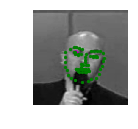

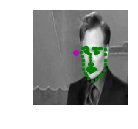

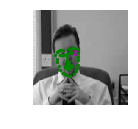

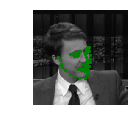

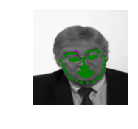

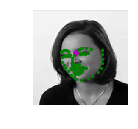

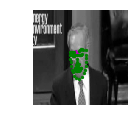

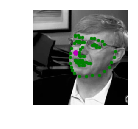

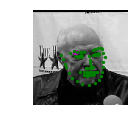

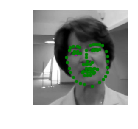

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
    
    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data  # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.SmoothL1Loss()

optimizer = optim.Adam(net.parameters(), lr=.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [14]:
import tqdm
def train_net(n_epochs):
    
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     torch.cuda.set_device(0)
    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in tqdm.tqdm_notebook(enumerate(train_loader), total=len(train_loader)):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor).cuda()
            images = images.type(torch.FloatTensor).cuda()#to('cuda')

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [15]:
# train your network
n_epochs = 40 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 2.5366826705634593
Epoch: 1, Batch: 20, Avg. Loss: 0.04189431443810463
Epoch: 1, Batch: 30, Avg. Loss: 0.034680554643273354
Epoch: 1, Batch: 40, Avg. Loss: 0.03400266375392676
Epoch: 1, Batch: 50, Avg. Loss: 0.030476347357034684
Epoch: 1, Batch: 60, Avg. Loss: 0.03222098387777805
Epoch: 1, Batch: 70, Avg. Loss: 0.03213900234550238
Epoch: 1, Batch: 80, Avg. Loss: 0.02981520052999258
Epoch: 1, Batch: 90, Avg. Loss: 0.03206895720213652
Epoch: 1, Batch: 100, Avg. Loss: 0.029140104539692402



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 2, Batch: 10, Avg. Loss: 0.027361886575818062
Epoch: 2, Batch: 20, Avg. Loss: 0.030280144326388835
Epoch: 2, Batch: 30, Avg. Loss: 0.03039031196385622
Epoch: 2, Batch: 40, Avg. Loss: 0.02730336841195822
Epoch: 2, Batch: 50, Avg. Loss: 0.02580374330282211
Epoch: 2, Batch: 60, Avg. Loss: 0.02358318231999874
Epoch: 2, Batch: 70, Avg. Loss: 0.022817847970873117
Epoch: 2, Batch: 80, Avg. Loss: 0.024924837239086627
Epoch: 2, Batch: 90, Avg. Loss: 0.024998759850859642
Epoch: 2, Batch: 100, Avg. Loss: 0.023639613762497902



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 3, Batch: 10, Avg. Loss: 0.0212875310331583
Epoch: 3, Batch: 20, Avg. Loss: 0.02128272457048297
Epoch: 3, Batch: 30, Avg. Loss: 0.0172219330444932
Epoch: 3, Batch: 40, Avg. Loss: 0.018421749025583266
Epoch: 3, Batch: 50, Avg. Loss: 0.02043814053758979
Epoch: 3, Batch: 60, Avg. Loss: 0.015666357520967723
Epoch: 3, Batch: 70, Avg. Loss: 0.01592762628570199
Epoch: 3, Batch: 80, Avg. Loss: 0.018771549221128225
Epoch: 3, Batch: 90, Avg. Loss: 0.02106342613697052
Epoch: 3, Batch: 100, Avg. Loss: 0.016782379057258368



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 4, Batch: 10, Avg. Loss: 0.014634034968912602
Epoch: 4, Batch: 20, Avg. Loss: 0.015011457726359367
Epoch: 4, Batch: 30, Avg. Loss: 0.015386049356311559
Epoch: 4, Batch: 40, Avg. Loss: 0.013715246692299843
Epoch: 4, Batch: 50, Avg. Loss: 0.014636060874909162
Epoch: 4, Batch: 60, Avg. Loss: 0.012591740395873786
Epoch: 4, Batch: 70, Avg. Loss: 0.016119429469108583
Epoch: 4, Batch: 80, Avg. Loss: 0.01419813958927989
Epoch: 4, Batch: 90, Avg. Loss: 0.01399482786655426
Epoch: 4, Batch: 100, Avg. Loss: 0.013881085533648729



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 5, Batch: 10, Avg. Loss: 0.012120157480239868
Epoch: 5, Batch: 20, Avg. Loss: 0.011190925911068916
Epoch: 5, Batch: 30, Avg. Loss: 0.010826139990240336
Epoch: 5, Batch: 40, Avg. Loss: 0.012183963460847736
Epoch: 5, Batch: 50, Avg. Loss: 0.011530212312936782
Epoch: 5, Batch: 60, Avg. Loss: 0.00982019784860313
Epoch: 5, Batch: 70, Avg. Loss: 0.010567835252732038
Epoch: 5, Batch: 80, Avg. Loss: 0.009697795147076249
Epoch: 5, Batch: 90, Avg. Loss: 0.009437211044132709
Epoch: 5, Batch: 100, Avg. Loss: 0.010497335810214281



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 6, Batch: 10, Avg. Loss: 0.010439237160608173
Epoch: 6, Batch: 20, Avg. Loss: 0.009480969002470373
Epoch: 6, Batch: 30, Avg. Loss: 0.008200350543484091
Epoch: 6, Batch: 40, Avg. Loss: 0.0082428231369704
Epoch: 6, Batch: 50, Avg. Loss: 0.007615844439715147
Epoch: 6, Batch: 60, Avg. Loss: 0.008288114424794912
Epoch: 6, Batch: 70, Avg. Loss: 0.008275360660627484
Epoch: 6, Batch: 80, Avg. Loss: 0.009254514751955868
Epoch: 6, Batch: 90, Avg. Loss: 0.00953409974463284
Epoch: 6, Batch: 100, Avg. Loss: 0.008101202733814716



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 7, Batch: 10, Avg. Loss: 0.008872996456921101
Epoch: 7, Batch: 20, Avg. Loss: 0.0083817383274436
Epoch: 7, Batch: 30, Avg. Loss: 0.0112729262560606
Epoch: 7, Batch: 40, Avg. Loss: 0.00851758043281734
Epoch: 7, Batch: 50, Avg. Loss: 0.007792973564937711
Epoch: 7, Batch: 60, Avg. Loss: 0.006687160907313227
Epoch: 7, Batch: 70, Avg. Loss: 0.006304618436843157
Epoch: 7, Batch: 80, Avg. Loss: 0.006113663734868169
Epoch: 7, Batch: 90, Avg. Loss: 0.0073337063658982515
Epoch: 7, Batch: 100, Avg. Loss: 0.005856863362714649



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 8, Batch: 10, Avg. Loss: 0.005569706484675407
Epoch: 8, Batch: 20, Avg. Loss: 0.005301003088243305
Epoch: 8, Batch: 30, Avg. Loss: 0.004841352603398264
Epoch: 8, Batch: 40, Avg. Loss: 0.004864784725941718
Epoch: 8, Batch: 50, Avg. Loss: 0.005395891238003969
Epoch: 8, Batch: 60, Avg. Loss: 0.005154310166835785
Epoch: 8, Batch: 70, Avg. Loss: 0.005233073397539556
Epoch: 8, Batch: 80, Avg. Loss: 0.006705998303368687
Epoch: 8, Batch: 90, Avg. Loss: 0.006182453129440546
Epoch: 8, Batch: 100, Avg. Loss: 0.005758641334250569



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 9, Batch: 10, Avg. Loss: 0.0057269115000963215
Epoch: 9, Batch: 20, Avg. Loss: 0.004690197529271245
Epoch: 9, Batch: 30, Avg. Loss: 0.004351261770352721
Epoch: 9, Batch: 40, Avg. Loss: 0.004561099992133677
Epoch: 9, Batch: 50, Avg. Loss: 0.004132328066043555
Epoch: 9, Batch: 60, Avg. Loss: 0.003709656000137329
Epoch: 9, Batch: 70, Avg. Loss: 0.004047165112569928
Epoch: 9, Batch: 80, Avg. Loss: 0.003918770863674581
Epoch: 9, Batch: 90, Avg. Loss: 0.004459922597743571
Epoch: 9, Batch: 100, Avg. Loss: 0.004688252648338676



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 10, Batch: 10, Avg. Loss: 0.004198993486352265
Epoch: 10, Batch: 20, Avg. Loss: 0.0037336792098358273
Epoch: 10, Batch: 30, Avg. Loss: 0.003806629218161106
Epoch: 10, Batch: 40, Avg. Loss: 0.003843994834460318
Epoch: 10, Batch: 50, Avg. Loss: 0.003692462667822838
Epoch: 10, Batch: 60, Avg. Loss: 0.0032473941100761294
Epoch: 10, Batch: 70, Avg. Loss: 0.003425872651860118
Epoch: 10, Batch: 80, Avg. Loss: 0.003507185564376414
Epoch: 10, Batch: 90, Avg. Loss: 0.003488691081292927
Epoch: 10, Batch: 100, Avg. Loss: 0.003555434127338231



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 11, Batch: 10, Avg. Loss: 0.003504914161749184
Epoch: 11, Batch: 20, Avg. Loss: 0.0031543368939310314
Epoch: 11, Batch: 30, Avg. Loss: 0.0030729170190170406
Epoch: 11, Batch: 40, Avg. Loss: 0.003177705267444253
Epoch: 11, Batch: 50, Avg. Loss: 0.0035115753766149283
Epoch: 11, Batch: 60, Avg. Loss: 0.0033106279908679424
Epoch: 11, Batch: 70, Avg. Loss: 0.0030251432908698916
Epoch: 11, Batch: 80, Avg. Loss: 0.003340725414454937
Epoch: 11, Batch: 90, Avg. Loss: 0.0029616204323247076
Epoch: 11, Batch: 100, Avg. Loss: 0.003537896368652582



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 12, Batch: 10, Avg. Loss: 0.0036449523642659186
Epoch: 12, Batch: 20, Avg. Loss: 0.0036737818736582994
Epoch: 12, Batch: 30, Avg. Loss: 0.002658405900001526
Epoch: 12, Batch: 40, Avg. Loss: 0.003219565306790173
Epoch: 12, Batch: 50, Avg. Loss: 0.003130299667827785
Epoch: 12, Batch: 60, Avg. Loss: 0.0030163003597408534
Epoch: 12, Batch: 70, Avg. Loss: 0.002469749271403998
Epoch: 12, Batch: 80, Avg. Loss: 0.002518711565062404
Epoch: 12, Batch: 90, Avg. Loss: 0.0028963396325707436
Epoch: 12, Batch: 100, Avg. Loss: 0.0028922340366989373



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 13, Batch: 10, Avg. Loss: 0.0026763021713122727
Epoch: 13, Batch: 20, Avg. Loss: 0.0024025836028158665
Epoch: 13, Batch: 30, Avg. Loss: 0.0024283186066895723
Epoch: 13, Batch: 40, Avg. Loss: 0.002346672827843577
Epoch: 13, Batch: 50, Avg. Loss: 0.0023094145231880247
Epoch: 13, Batch: 60, Avg. Loss: 0.002374675078317523
Epoch: 13, Batch: 70, Avg. Loss: 0.002588455751538277
Epoch: 13, Batch: 80, Avg. Loss: 0.0024790289113298058
Epoch: 13, Batch: 90, Avg. Loss: 0.0026477075647562743
Epoch: 13, Batch: 100, Avg. Loss: 0.0027232844615355132



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 14, Batch: 10, Avg. Loss: 0.0021968001266941426
Epoch: 14, Batch: 20, Avg. Loss: 0.0027627411764115095
Epoch: 14, Batch: 30, Avg. Loss: 0.0028663356089964507
Epoch: 14, Batch: 40, Avg. Loss: 0.0027718863449990748
Epoch: 14, Batch: 50, Avg. Loss: 0.0026546445908024905
Epoch: 14, Batch: 60, Avg. Loss: 0.0024552571238018574
Epoch: 14, Batch: 70, Avg. Loss: 0.0023268442717380823
Epoch: 14, Batch: 80, Avg. Loss: 0.0022423310205340386
Epoch: 14, Batch: 90, Avg. Loss: 0.0027883942355401816
Epoch: 14, Batch: 100, Avg. Loss: 0.0022287464118562637



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 15, Batch: 10, Avg. Loss: 0.0027766134589910507
Epoch: 15, Batch: 20, Avg. Loss: 0.0023524903110228477
Epoch: 15, Batch: 30, Avg. Loss: 0.00247714965371415
Epoch: 15, Batch: 40, Avg. Loss: 0.0023305734735913574
Epoch: 15, Batch: 50, Avg. Loss: 0.002057903481181711
Epoch: 15, Batch: 60, Avg. Loss: 0.0022187578841112556
Epoch: 15, Batch: 70, Avg. Loss: 0.0018775291740894318
Epoch: 15, Batch: 80, Avg. Loss: 0.0017152172164060175
Epoch: 15, Batch: 90, Avg. Loss: 0.001965521287638694
Epoch: 15, Batch: 100, Avg. Loss: 0.0022697267238982024



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 16, Batch: 10, Avg. Loss: 0.0019968471373431385
Epoch: 16, Batch: 20, Avg. Loss: 0.002026221202686429
Epoch: 16, Batch: 30, Avg. Loss: 0.001873635151423514
Epoch: 16, Batch: 40, Avg. Loss: 0.0018541566329076885
Epoch: 16, Batch: 50, Avg. Loss: 0.002130814467091113
Epoch: 16, Batch: 60, Avg. Loss: 0.002136168396100402
Epoch: 16, Batch: 70, Avg. Loss: 0.0017755795153789223
Epoch: 16, Batch: 80, Avg. Loss: 0.0020961449947208164
Epoch: 16, Batch: 90, Avg. Loss: 0.0018704054760746657
Epoch: 16, Batch: 100, Avg. Loss: 0.0019937200471758843



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 17, Batch: 10, Avg. Loss: 0.002211433707270771
Epoch: 17, Batch: 20, Avg. Loss: 0.0019621819257736204
Epoch: 17, Batch: 30, Avg. Loss: 0.001758317882195115
Epoch: 17, Batch: 40, Avg. Loss: 0.0018101231544278562
Epoch: 17, Batch: 50, Avg. Loss: 0.002070266555529088
Epoch: 17, Batch: 60, Avg. Loss: 0.0019860854372382164
Epoch: 17, Batch: 70, Avg. Loss: 0.0020150749944150446
Epoch: 17, Batch: 80, Avg. Loss: 0.0020553971640765666
Epoch: 17, Batch: 90, Avg. Loss: 0.002192327193915844
Epoch: 17, Batch: 100, Avg. Loss: 0.002321993641089648



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 18, Batch: 10, Avg. Loss: 0.0016689368640072644
Epoch: 18, Batch: 20, Avg. Loss: 0.00187252894975245
Epoch: 18, Batch: 30, Avg. Loss: 0.002257487119641155
Epoch: 18, Batch: 40, Avg. Loss: 0.002224356553051621
Epoch: 18, Batch: 50, Avg. Loss: 0.0018614619504660368
Epoch: 18, Batch: 60, Avg. Loss: 0.0016244554310105741
Epoch: 18, Batch: 70, Avg. Loss: 0.0016740165301598608
Epoch: 18, Batch: 80, Avg. Loss: 0.0017339008511044085
Epoch: 18, Batch: 90, Avg. Loss: 0.002135646715760231
Epoch: 18, Batch: 100, Avg. Loss: 0.002230530173983425



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 19, Batch: 10, Avg. Loss: 0.0017558829393237829
Epoch: 19, Batch: 20, Avg. Loss: 0.001898633048404008
Epoch: 19, Batch: 30, Avg. Loss: 0.001706146530341357
Epoch: 19, Batch: 40, Avg. Loss: 0.001686380908358842
Epoch: 19, Batch: 50, Avg. Loss: 0.001556830934714526
Epoch: 19, Batch: 60, Avg. Loss: 0.0013938905321992934
Epoch: 19, Batch: 70, Avg. Loss: 0.001479795086197555
Epoch: 19, Batch: 80, Avg. Loss: 0.002029703767038882
Epoch: 19, Batch: 90, Avg. Loss: 0.002200248301960528
Epoch: 19, Batch: 100, Avg. Loss: 0.001830091408919543



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 20, Batch: 10, Avg. Loss: 0.001987425028346479
Epoch: 20, Batch: 20, Avg. Loss: 0.001862747990526259
Epoch: 20, Batch: 30, Avg. Loss: 0.0018523011356592178
Epoch: 20, Batch: 40, Avg. Loss: 0.0021616355632431807
Epoch: 20, Batch: 50, Avg. Loss: 0.002360099321231246
Epoch: 20, Batch: 60, Avg. Loss: 0.0019263295689597726
Epoch: 20, Batch: 70, Avg. Loss: 0.0019165990059264004
Epoch: 20, Batch: 80, Avg. Loss: 0.001544994127471
Epoch: 20, Batch: 90, Avg. Loss: 0.0015121166594326495
Epoch: 20, Batch: 100, Avg. Loss: 0.0017244894173927606



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 21, Batch: 10, Avg. Loss: 0.0022072220453992486
Epoch: 21, Batch: 20, Avg. Loss: 0.0019867234164848923
Epoch: 21, Batch: 30, Avg. Loss: 0.0019568924559280275
Epoch: 21, Batch: 40, Avg. Loss: 0.0016275119152851403
Epoch: 21, Batch: 50, Avg. Loss: 0.0022705458803102376
Epoch: 21, Batch: 60, Avg. Loss: 0.002372678881511092
Epoch: 21, Batch: 70, Avg. Loss: 0.0017336647259071469
Epoch: 21, Batch: 80, Avg. Loss: 0.0018020013929344713
Epoch: 21, Batch: 90, Avg. Loss: 0.001936351100448519
Epoch: 21, Batch: 100, Avg. Loss: 0.001996940921526402



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 22, Batch: 10, Avg. Loss: 0.002108366717584431
Epoch: 22, Batch: 20, Avg. Loss: 0.002025610057171434
Epoch: 22, Batch: 30, Avg. Loss: 0.001975889876484871
Epoch: 22, Batch: 40, Avg. Loss: 0.0019268542644567787
Epoch: 22, Batch: 50, Avg. Loss: 0.0018222385202534496
Epoch: 22, Batch: 60, Avg. Loss: 0.001670895202551037
Epoch: 22, Batch: 70, Avg. Loss: 0.0018694910453632475
Epoch: 22, Batch: 80, Avg. Loss: 0.001542643562424928
Epoch: 22, Batch: 90, Avg. Loss: 0.0016799588105641306
Epoch: 22, Batch: 100, Avg. Loss: 0.001557206641882658



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 23, Batch: 10, Avg. Loss: 0.0015052827191539108
Epoch: 23, Batch: 20, Avg. Loss: 0.0013603306375443935
Epoch: 23, Batch: 30, Avg. Loss: 0.002011176780797541
Epoch: 23, Batch: 40, Avg. Loss: 0.001678575377445668
Epoch: 23, Batch: 50, Avg. Loss: 0.001577270880807191
Epoch: 23, Batch: 60, Avg. Loss: 0.0015499471221119166
Epoch: 23, Batch: 70, Avg. Loss: 0.0016860332223586738
Epoch: 23, Batch: 80, Avg. Loss: 0.00155052887275815
Epoch: 23, Batch: 90, Avg. Loss: 0.0014667143346741795
Epoch: 23, Batch: 100, Avg. Loss: 0.0013592544128187



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 24, Batch: 10, Avg. Loss: 0.0014882211689837277
Epoch: 24, Batch: 20, Avg. Loss: 0.0014346751617267729
Epoch: 24, Batch: 30, Avg. Loss: 0.0013951015542261302
Epoch: 24, Batch: 40, Avg. Loss: 0.0014609371544793248
Epoch: 24, Batch: 50, Avg. Loss: 0.0016768372734077275
Epoch: 24, Batch: 60, Avg. Loss: 0.0013940130593255162
Epoch: 24, Batch: 70, Avg. Loss: 0.002504822320770472
Epoch: 24, Batch: 80, Avg. Loss: 0.001878092426341027
Epoch: 24, Batch: 90, Avg. Loss: 0.0017225527437403799
Epoch: 24, Batch: 100, Avg. Loss: 0.0014442986401263624



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 25, Batch: 10, Avg. Loss: 0.0015750787919387222
Epoch: 25, Batch: 20, Avg. Loss: 0.0016196566983126103
Epoch: 25, Batch: 30, Avg. Loss: 0.0016460502054542303
Epoch: 25, Batch: 40, Avg. Loss: 0.0014205509796738625
Epoch: 25, Batch: 50, Avg. Loss: 0.0013870944618247449
Epoch: 25, Batch: 60, Avg. Loss: 0.001507399114780128
Epoch: 25, Batch: 70, Avg. Loss: 0.001407564163673669
Epoch: 25, Batch: 80, Avg. Loss: 0.0016173247713595629
Epoch: 25, Batch: 90, Avg. Loss: 0.0014853410189971327
Epoch: 25, Batch: 100, Avg. Loss: 0.0015675263130106032



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 26, Batch: 10, Avg. Loss: 0.001548724272288382
Epoch: 26, Batch: 20, Avg. Loss: 0.0013510449440218507
Epoch: 26, Batch: 30, Avg. Loss: 0.0016110333614051341
Epoch: 26, Batch: 40, Avg. Loss: 0.0015444894786924123
Epoch: 26, Batch: 50, Avg. Loss: 0.0013900936930440367
Epoch: 26, Batch: 60, Avg. Loss: 0.0014492371235974133
Epoch: 26, Batch: 70, Avg. Loss: 0.0013563677319325506
Epoch: 26, Batch: 80, Avg. Loss: 0.0013777717831544578
Epoch: 26, Batch: 90, Avg. Loss: 0.0013355902512557805
Epoch: 26, Batch: 100, Avg. Loss: 0.0013099582283757627



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 27, Batch: 10, Avg. Loss: 0.0015496406820602715
Epoch: 27, Batch: 20, Avg. Loss: 0.0018014031345956027
Epoch: 27, Batch: 30, Avg. Loss: 0.001515582634601742
Epoch: 27, Batch: 40, Avg. Loss: 0.0019507348071783781
Epoch: 27, Batch: 50, Avg. Loss: 0.0016399265732616186
Epoch: 27, Batch: 60, Avg. Loss: 0.001384798821527511
Epoch: 27, Batch: 70, Avg. Loss: 0.0012938929139636457
Epoch: 27, Batch: 80, Avg. Loss: 0.0011809982708655298
Epoch: 27, Batch: 90, Avg. Loss: 0.0012679895968176424
Epoch: 27, Batch: 100, Avg. Loss: 0.001350464893039316



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 28, Batch: 10, Avg. Loss: 0.0015192207181826233
Epoch: 28, Batch: 20, Avg. Loss: 0.001250765728764236
Epoch: 28, Batch: 30, Avg. Loss: 0.0014473821385763586
Epoch: 28, Batch: 40, Avg. Loss: 0.0012560465198475867
Epoch: 28, Batch: 50, Avg. Loss: 0.0013599068915937096
Epoch: 28, Batch: 60, Avg. Loss: 0.001431204576510936
Epoch: 28, Batch: 70, Avg. Loss: 0.0013201316527556629
Epoch: 28, Batch: 80, Avg. Loss: 0.0012568801990710198
Epoch: 28, Batch: 90, Avg. Loss: 0.001425690925680101
Epoch: 28, Batch: 100, Avg. Loss: 0.0013291934970766305



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 29, Batch: 10, Avg. Loss: 0.0016883487929590046
Epoch: 29, Batch: 20, Avg. Loss: 0.0016209371155127884
Epoch: 29, Batch: 30, Avg. Loss: 0.001491417270153761
Epoch: 29, Batch: 40, Avg. Loss: 0.001535585056990385
Epoch: 29, Batch: 50, Avg. Loss: 0.001598318258766085
Epoch: 29, Batch: 60, Avg. Loss: 0.0013729549362324178
Epoch: 29, Batch: 70, Avg. Loss: 0.001315107336267829
Epoch: 29, Batch: 80, Avg. Loss: 0.0013782568741589785
Epoch: 29, Batch: 90, Avg. Loss: 0.0015329731744714082
Epoch: 29, Batch: 100, Avg. Loss: 0.001511875109281391



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 30, Batch: 10, Avg. Loss: 0.001876335556153208
Epoch: 30, Batch: 20, Avg. Loss: 0.0016786052379757165
Epoch: 30, Batch: 30, Avg. Loss: 0.0014577576075680554
Epoch: 30, Batch: 40, Avg. Loss: 0.0014028271310962737
Epoch: 30, Batch: 50, Avg. Loss: 0.0013946218183264135
Epoch: 30, Batch: 60, Avg. Loss: 0.0013902440550737083
Epoch: 30, Batch: 70, Avg. Loss: 0.001313186320476234
Epoch: 30, Batch: 80, Avg. Loss: 0.0014265296398662032
Epoch: 30, Batch: 90, Avg. Loss: 0.001157994958339259
Epoch: 30, Batch: 100, Avg. Loss: 0.001355076569598168



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 31, Batch: 10, Avg. Loss: 0.0012245972990058362
Epoch: 31, Batch: 20, Avg. Loss: 0.0011549968330655247
Epoch: 31, Batch: 30, Avg. Loss: 0.0013420391362160445
Epoch: 31, Batch: 40, Avg. Loss: 0.001279662037268281
Epoch: 31, Batch: 50, Avg. Loss: 0.0012024950701743364
Epoch: 31, Batch: 60, Avg. Loss: 0.0012682377127930522
Epoch: 31, Batch: 70, Avg. Loss: 0.0013312541763298214
Epoch: 31, Batch: 80, Avg. Loss: 0.0013083539670333266
Epoch: 31, Batch: 90, Avg. Loss: 0.0012904667761176824
Epoch: 31, Batch: 100, Avg. Loss: 0.0012221045966725797



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 32, Batch: 10, Avg. Loss: 0.0011592297116294504
Epoch: 32, Batch: 20, Avg. Loss: 0.0011277554091066121
Epoch: 32, Batch: 30, Avg. Loss: 0.001017588342074305
Epoch: 32, Batch: 40, Avg. Loss: 0.001047163299517706
Epoch: 32, Batch: 50, Avg. Loss: 0.001047345995903015
Epoch: 32, Batch: 60, Avg. Loss: 0.0012195720919407904
Epoch: 32, Batch: 70, Avg. Loss: 0.0010843482275959104
Epoch: 32, Batch: 80, Avg. Loss: 0.0011535422352608293
Epoch: 32, Batch: 90, Avg. Loss: 0.0013084999751299619
Epoch: 32, Batch: 100, Avg. Loss: 0.0012646663002669812



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 33, Batch: 10, Avg. Loss: 0.001505856798030436
Epoch: 33, Batch: 20, Avg. Loss: 0.0017098745796829463
Epoch: 33, Batch: 30, Avg. Loss: 0.001479054766241461
Epoch: 33, Batch: 40, Avg. Loss: 0.001453404373023659
Epoch: 33, Batch: 50, Avg. Loss: 0.0018220976926386356
Epoch: 33, Batch: 60, Avg. Loss: 0.0013698101509362459
Epoch: 33, Batch: 70, Avg. Loss: 0.0012572105159051716
Epoch: 33, Batch: 80, Avg. Loss: 0.0014470220543444158
Epoch: 33, Batch: 90, Avg. Loss: 0.001337434654124081
Epoch: 33, Batch: 100, Avg. Loss: 0.0011220283282455056



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 34, Batch: 10, Avg. Loss: 0.0012785926344804465
Epoch: 34, Batch: 20, Avg. Loss: 0.0011675118294078857
Epoch: 34, Batch: 30, Avg. Loss: 0.0013069561216980218
Epoch: 34, Batch: 40, Avg. Loss: 0.0012812727014534175
Epoch: 34, Batch: 50, Avg. Loss: 0.0014652703539468348
Epoch: 34, Batch: 60, Avg. Loss: 0.0015633649309165776
Epoch: 34, Batch: 70, Avg. Loss: 0.0012743696570396423
Epoch: 34, Batch: 80, Avg. Loss: 0.0012853789085056633
Epoch: 34, Batch: 90, Avg. Loss: 0.0014038032211828976
Epoch: 34, Batch: 100, Avg. Loss: 0.001182065304601565



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 35, Batch: 10, Avg. Loss: 0.0011172625061590224
Epoch: 35, Batch: 20, Avg. Loss: 0.0012671454926021398
Epoch: 35, Batch: 30, Avg. Loss: 0.0011054285569116473
Epoch: 35, Batch: 40, Avg. Loss: 0.0012818427640013397
Epoch: 35, Batch: 50, Avg. Loss: 0.0011215178819838911
Epoch: 35, Batch: 60, Avg. Loss: 0.0011916454415768385
Epoch: 35, Batch: 70, Avg. Loss: 0.0011383596051018686
Epoch: 35, Batch: 80, Avg. Loss: 0.0015443144016899168
Epoch: 35, Batch: 90, Avg. Loss: 0.0015215199440717698
Epoch: 35, Batch: 100, Avg. Loss: 0.0012846010504290462



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 36, Batch: 10, Avg. Loss: 0.0012539803283289075
Epoch: 36, Batch: 20, Avg. Loss: 0.0012965820264071227
Epoch: 36, Batch: 30, Avg. Loss: 0.0011451193131506443
Epoch: 36, Batch: 40, Avg. Loss: 0.0010784137470182032
Epoch: 36, Batch: 50, Avg. Loss: 0.0011585416097659618
Epoch: 36, Batch: 60, Avg. Loss: 0.0014485310297459365
Epoch: 36, Batch: 70, Avg. Loss: 0.0015892784926109017
Epoch: 36, Batch: 80, Avg. Loss: 0.0014342705952003598
Epoch: 36, Batch: 90, Avg. Loss: 0.001627879578154534
Epoch: 36, Batch: 100, Avg. Loss: 0.0016718609491363167



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 37, Batch: 10, Avg. Loss: 0.0016430380404926837
Epoch: 37, Batch: 20, Avg. Loss: 0.0019142697448842228
Epoch: 37, Batch: 30, Avg. Loss: 0.0017504271352663636
Epoch: 37, Batch: 40, Avg. Loss: 0.0015024781227111817
Epoch: 37, Batch: 50, Avg. Loss: 0.0013926505111157895
Epoch: 37, Batch: 60, Avg. Loss: 0.0012759511941112579
Epoch: 37, Batch: 70, Avg. Loss: 0.0013304713880643248
Epoch: 37, Batch: 80, Avg. Loss: 0.001386272197123617
Epoch: 37, Batch: 90, Avg. Loss: 0.0013937726442236453
Epoch: 37, Batch: 100, Avg. Loss: 0.0013309877773281186



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 38, Batch: 10, Avg. Loss: 0.001399675861466676
Epoch: 38, Batch: 20, Avg. Loss: 0.0013461276306770743
Epoch: 38, Batch: 30, Avg. Loss: 0.0013467578683048487
Epoch: 38, Batch: 40, Avg. Loss: 0.0014835364534519612
Epoch: 38, Batch: 50, Avg. Loss: 0.001299694669432938
Epoch: 38, Batch: 60, Avg. Loss: 0.0016421910491771995
Epoch: 38, Batch: 70, Avg. Loss: 0.0018870909581892193
Epoch: 38, Batch: 80, Avg. Loss: 0.001406348671298474
Epoch: 38, Batch: 90, Avg. Loss: 0.001443439070135355
Epoch: 38, Batch: 100, Avg. Loss: 0.0014049477293156087



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 39, Batch: 10, Avg. Loss: 0.0013138126581907273
Epoch: 39, Batch: 20, Avg. Loss: 0.0013209598837420344
Epoch: 39, Batch: 30, Avg. Loss: 0.0013918401906266808
Epoch: 39, Batch: 40, Avg. Loss: 0.0014376316568814218
Epoch: 39, Batch: 50, Avg. Loss: 0.001228261913638562
Epoch: 39, Batch: 60, Avg. Loss: 0.001317969453521073
Epoch: 39, Batch: 70, Avg. Loss: 0.0011803911591414362
Epoch: 39, Batch: 80, Avg. Loss: 0.0011668187158647924
Epoch: 39, Batch: 90, Avg. Loss: 0.0011935051064938308
Epoch: 39, Batch: 100, Avg. Loss: 0.0013299873215146362



HBox(children=(IntProgress(value=0, max=109), HTML(value='')))

Epoch: 40, Batch: 10, Avg. Loss: 0.0011890185298398138
Epoch: 40, Batch: 20, Avg. Loss: 0.001064916723407805
Epoch: 40, Batch: 30, Avg. Loss: 0.0010194082395173609
Epoch: 40, Batch: 40, Avg. Loss: 0.0011427703546360135
Epoch: 40, Batch: 50, Avg. Loss: 0.001090403605485335
Epoch: 40, Batch: 60, Avg. Loss: 0.001156193920178339
Epoch: 40, Batch: 70, Avg. Loss: 0.0010408013360574842
Epoch: 40, Batch: 80, Avg. Loss: 0.001219106320058927
Epoch: 40, Batch: 90, Avg. Loss: 0.0010269418940879404
Epoch: 40, Batch: 100, Avg. Loss: 0.0014891935104969888

Finished Training


## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [16]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([16, 1, 224, 224])
torch.Size([16, 68, 2])
torch.Size([16, 68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


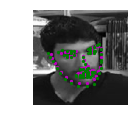

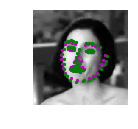

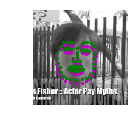

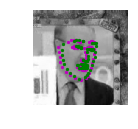

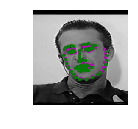

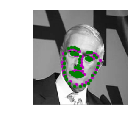

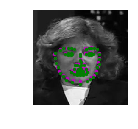

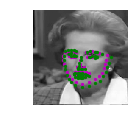

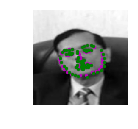

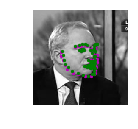

In [17]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [18]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_2_Smooth.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I used Adam optimizer with learning rate of 0.001, betas remained default values.
Two loss functions were tested, MSELoss and SmoothL1. Comparing the results, SmoothL1 showed better keypoints on the test dataset


### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: Even though I used udacity workspace, unfortunately I had low memory issues that prevented me from using convolutional layers with large channel size (the maximum feasible output was 32). The issue was addressed [here](https://knowledge.udacity.com/questions/185645).

Therefore I used 3 convolutional layers starting with 8 output channel and ending to 32. After each channel a batch-normalization layer is used with relu actication function. Eventually 3 fully connected layers with dropout function in between are used to detect $2\times68$ keypoints.

The model showed a fair performance in detecting the facial keypoints, however, it could certainly improve by employing more complex architecture provided that sufficient memory is available.


### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: To optimize memory usage the batch-size is to be a power of 2. The other element in choosing the batchsize is the number of batches for training. Smaller batch-size showed to have better accuracy. Here I chose 32 for the batch size which results in about 100 batches.

I tried several values  for number of epoch, however, there was not that much change after 30-40. Besides, increasing it may lead to overfitting. 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.1757962  -0.24951172 -0.32992721]
 [ 0.25385207 -0.33313915  0.02386419]
 [ 0.30953777  0.06628514  0.04536542]]
(3, 3)


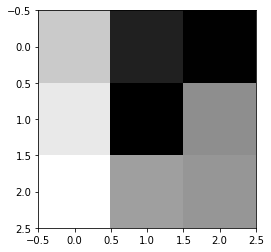

In [26]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.cpu().data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')

## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

(-0.5, 223.5, 223.5, -0.5)

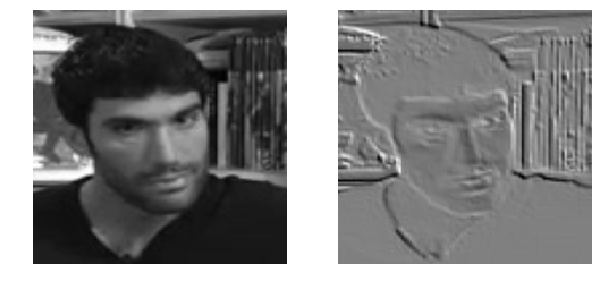

In [25]:
##TODO: load in and display any image from the transformed test dataset
import cv2
## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image
plt.figure(figsize=(10,5))

src = test_images[0].squeeze().numpy()
plt.subplot(1,2,1)
plt.imshow(src, 'gray')
plt.axis('off')

dst = src.copy()
filtered=cv2.filter2D(src, ddepth=-1, kernel=w[0][0], dst=dst)
plt.subplot(1,2,2)
plt.imshow(filtered, 'gray')
plt.axis('off')

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: This filter seems to be an edge detector and was able to detect vertical lines better than horizontal lines. However, the filter, that is shown in previous cell, has similar structure to vertical edge detector filter

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!